In [130]:
import pandas as pd
import seaborn as sns
import warnings
from IPython.display import Image


warnings.filterwarnings(action='ignore')
sns.set_theme(style="whitegrid")

# 1. Medicinal Material
This is a list of medicinal materials provided by TM-MC 2.0 that were listed in the Korean, Chinese, and Japanese pharmacopoeias.
Medicinal materials were distinguished by their scientific names.
Due to differences between pharmacopoeias, a single medicinal material in one pharmacopoeia may map to two medicinal materials in another pharmacopoeia.
- Latin: the latin name of a medicinal material, which is the identifier of medicinal materials in TM-MC. (Mandatory)
- Common: the english name of a medicinal material as described in pharmacopoeias. (Optional)
- Korean: the Korean name of a medicinal material. (Mandatory)
- Hanja: the hanja name of a medicinal material. (Optional)
- Chinese: the Chinese name of a medicinal material. (Optional)
- Pinyin: the pinyin name of a medicinal material. (Optional)
- Japanese: the Japanese name of a medicinal material. (Optional)
- Kanji: the kanji name of a medicinal material. (Optional)

In [75]:
df_MM = pd.read_excel('medicinal_material.xlsx',index_col=0)
df_MM

C:\Users\S.Yoon\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  """Entry point for launching an IPython kernel.


,COMMON,KOREAN,HANJA,CHINESE,PINYIN,JAPANESE,KANJI
LATIN,,,,,,,
Abelmoschi Corolla,NaN,황촉규화,黃蜀葵花,黄蜀葵花,Huangshukuihua,NaN,NaN
Abri Herba,NaN,계골초,鷄骨草,鸡骨草,Jigucao,NaN,NaN
Abutili Semen,NaN,경마자,苘麻子,苘麻子,Qingmazi,NaN,NaN
Acanthopanacis Cortex,Acanthopanax Root Bark,오가피,五加皮,五加皮,Wujiapi,NaN,NaN
Acanthopanacis Senticosi Radix et Rhizoma,NaN,자오가,刺五加,刺五加,Ciwujia,シゴカ,刺五加
...,...,...,...,...,...,...,...
Zingiberis Rhizoma Praeparatum,NaN,포강,炮薑,NaN,NaN,NaN,NaN
Zingiberis Rhizoma Recens,Raw Ginger,생강,生薑,生姜,Shengjiang,ショウキョウ,生姜
Zizyphi Fructus,Jujube,대조,大棗,大枣,Dazao,タイソウ,大棗


In [77]:
print('# of TM_LATIN {}'.format(df_MM.index.nunique()))
print('# of TM_KOR {}'.format(df_MM.KOREAN.nunique()))

# of TM_LATIN 635
# of TM_KOR 634


In [78]:
df_MM['KOREAN'].value_counts()

진피      2
능소화     1
사담      1
백두옹     1
검인      1
       ..
산향원엽    1
구맥      1
박속      1
저담      1
섬피      1
Name: KOREAN, Length: 634, dtype: int64

## <font color='red'>Duplicated TM Problem</font>
- <font color='red'>진피 겹침</font>

In [79]:
m = df_MM['KOREAN'] == '진피'
df_MM[m]

,COMMON,KOREAN,HANJA,CHINESE,PINYIN,JAPANESE,KANJI
LATIN,,,,,,,
Citri Unshius Pericarpium,Citrus Unshiu Peel,진피,陳皮,陈皮,Chenpi,チンピ,陳皮
Fraxini Cortex,NaN,진피,秦皮,秦皮,Qinpi,NaN,NaN


# 2. Medicinal Compound
This is a list of chemical compounds of medicinal materials, which have been curated from PubMed articles.
All compounds have an identified TM-MC ID, and unidentified compounds have an ID of 0
- Latin: the latin name of a medicinal material. (Mandatory)
- ID: the identified TM-MC ID. (Mandatory)
- Compound: the compound name. (Mandatory)
- PMID: the PubMed ID from which a compound has been extracted and curated. (Mandatory)

In [82]:
df_MC = pd.read_excel('medicinal_compound.xlsx',index_col=0)
m = df_MC['ID'] != 0
df_MC = df_MC[m]
df_MC['vals']=1
df_MC

,ID,COMPOUND,PMID,vals
LATIN,,,,
Abelmoschi Corolla,490334,hibifolin,17258944,1
Abelmoschi Corolla,490334,hibifolin,19235125,1
Abelmoschi Corolla,490334,hibifolin,19298707,1
Abelmoschi Corolla,490334,hibifolin,21247814,1
Abelmoschi Corolla,490334,hibifolin,21784623,1
...,...,...,...,...
Zosterae Herba,125,luteolin,30804483,1
Zosterae Herba,124,apigenin,30804483,1
Zosterae Herba,113,caffeic acid,30804483,1


In [83]:
N_HERB = df_MC.index.nunique()
print('# of herb: {}'.format(N_HERB))
N_CPND = df_MC['COMPOUND'].nunique()
print('# of COMPOUND: {}'.format(N_CPND))
N_ID = df_MC['ID'].nunique()
print('# of ID: {}'.format(N_ID))


# of herb: 626
# of COMPOUND: 30746
# of ID: 21580


## <font color='red'>Non-matching ID Problem</font>
- <font color='red'>특정 약재안에 포함된 성분들을 나타내는 데이터로 COMPOUND와 ID는 1:1 매칭이 되어야 함</font>

In [99]:
ID_LST = sorted(list(df_MC['ID'].unique()))
DUP_LST = []
for ID in ID_LST:
    m = df_MC['ID'] == ID
    df_tmp = df_MC[m]
    if df_tmp['COMPOUND'].nunique() != 1:
        DUP_LST.append(ID)
print('# of non-matching ID {}'.format(len(DUP_LST)))

# of non-matching ID 4422


In [91]:
m = df_MC['ID'] == DUP_LST[0]
df_MC[m]

,ID,COMPOUND,PMID,vals
LATIN,,,,
Bufonis Venenum,1,"22,23-epoxyresibufogenin",21696903,1
Bufonis Venenum,1,resibufogenin,16723285,1
Bufonis Venenum,1,resibufogenin,20637273,1
Bufonis Venenum,1,resibufogenin,21696903,1
Bufonis Venenum,1,resibufogenin,23311159,1
Bufonis Venenum,1,resibufogenin,24484689,1
Bufonis Venenum,1,resibufogenin,25780654,1
Bufonis Venenum,1,resibufogenin,26186722,1
Bufonis Venenum,1,resibufogenin,26621782,1


In [92]:
m = df_MC['ID'] == DUP_LST[1]
df_MC[m]

,ID,COMPOUND,PMID,vals
LATIN,,,,
Bufonis Venenum,9,12β-hydroxylresibufogenin,31590467,1
Bufonis Venenum,9,12β-hydroxyresibufogenin,26186722,1
Bufonis Venenum,9,12β-hydroxyresibufogenin,27328884,1


In [93]:
m = df_MC['ID'] == DUP_LST[2]
df_MC[m]

,ID,COMPOUND,PMID,vals
LATIN,,,,
Bufonis Venenum,19,12β-hydroxycinobufagin,26186722,1
Bufonis Venenum,19,12β-hydroxycinobufagin,27063985,1
Bufonis Venenum,19,12β-hydroxycinobufagin,27790826,1
Bufonis Venenum,19,12β-hydroxylcinobufagin,29704033,1
Bufonis Venenum,19,12β-hydroxylcinobufagin,31590467,1


In [94]:
m = df_MC['ID'] == DUP_LST[3]
df_MC[m]

,ID,COMPOUND,PMID,vals
LATIN,,,,
Bufonis Venenum,46,1β-hydroxybufalin,26186722,1
Bufonis Venenum,46,1β-hydroxylbufalin,31590467,1


In [95]:
m = df_MC['ID'] == DUP_LST[4]
df_MC[m]

,ID,COMPOUND,PMID,vals
LATIN,,,,
Bufonis Venenum,48,19-hydroxybufalin,20637273,1
Bufonis Venenum,48,19-hydroxybufalin,21696903,1
Bufonis Venenum,48,19-hydroxybufalin,26186722,1
Bufonis Venenum,48,19-hydroxylbufalin,29704033,1
Bufonis Venenum,48,19-hydroxylbufalin,31590467,1


In [96]:
m = df_MC['ID'] == DUP_LST[5]
df_MC[m]

,ID,COMPOUND,PMID,vals
LATIN,,,,
Bufonis Venenum,71,gamabufotalin-3-oxalate,21696903,1
Bufonis Venenum,71,gamabufotalin-3-oxalate,31590467,1
Bufonis Venenum,71,gamabufotalin3-oxalate,29704033,1


In [97]:
m = df_MC['ID'] == DUP_LST[6]
df_MC[m]

,ID,COMPOUND,PMID,vals
LATIN,,,,
Bufonis Venenum,93,bufotalin-3-O-suberate-arginine,27790826,1
Bufonis Venenum,93,bufotoxin,27063985,1
Bufonis Venenum,93,bufotoxin,29704033,1
Bufonis Venenum,93,bufotoxin,31590467,1


In [98]:
m = df_MC['ID'] == DUP_LST[7]
df_MC[m]

,ID,COMPOUND,PMID,vals
LATIN,,,,
Bufonis Cutis,106,N-methyl serotonin,30591646,1
Bufonis Venenum,106,N'-methyl serotonin,29704033,1
Bufonis Venenum,106,N'-methyl-serotonin,31590467,1
Bufonis Venenum,106,N-methyl serotonin,30591646,1
Bufonis Venenum,106,N-methylserotonin,23311159,1


# 3. Chemical property
This contains identifiers and pharmacokinetic properties for identified compounds.

- ID: the identified TM-MC ID of a compound. (Mandatory)
- CID: the PubChem Compound ID of a compound. (Optional)
- InChIKey: the InChIKey of a compound. (Mandatory)
- SMILES: the SMILES string of a compound. (Mandatory)
- Formula: the molecular formula of a compound. (Mandatory)
- MW: the molecular weight. (Mandatory)
- Extract_MW: the exact molecular weight. (Mandatory)
- LogP: the octanol-water partition coefficient. (Mandatory)
- TPSA: the topological polar surface area. (Mandatory)
- ATOM: the number of atoms. (Mandatory)
- HBA: the number of hydrogen bond acceptors. (Mandatory)
- HBD: the number of hydrogen bond donors. (Mandatory)
- ROTB: the number of rotatable bonds. (Mandatory)
- AROM: the number of aromatic rings. (Mandatory)
- ALERTS: the number of structural alerts. (Mandatory)
- DL: the drug likeness. (Mandatory)
- OB: the oral bioavailability. (Mandatory)

In [100]:
df_CP = pd.read_excel('chemical_property.xlsx')
df_CP

,ID,CID,INCHIKEY,SMILES,FORMULA,MW,EXACT_MW,LOGP,TPSA,ATOM,HBA,HBD,ROTB,AROM,ALERTS,DL,OB
0,1,10063,ATLJNLYIJOCWJE-NEKURZDCSA-N,C[C@]12CCC3C(CC[C@@H]4C[C@@H](O)CC[C@]34C)[C@]...,C24H32O4,384.516,384.230060,3.364,59.06,60,3,1,1,1,1,0.755520,Y
1,2,NaN,ATLJNLYIJOCWJE-PYPJTOMLSA-N,C[C@]12CCC3C(CC[C@@H]4C[C@H](O)CC[C@]34C)[C@]1...,C24H32O4,384.516,384.230060,3.364,59.06,60,3,1,1,1,1,0.755520,Y
2,3,NaN,LFLJTMIVTFTLOA-HFMADZKOSA-N,C[C@]12CCC3C(CC[C@@H]4C[C@@H](O)CC[C@]34C=O)[C...,C24H30O5,398.499,398.209324,2.397,76.13,59,4,1,1,1,2,0.582202,Y
3,4,19937,IXZHDDUFQVXHIL-MBMNNJAJSA-N,C[C@]12CCC3C(CC[C@@H]4C[C@@H](O)CC[C@]34C)[C@]...,C24H32O5,400.515,400.224974,2.367,79.29,61,4,2,1,1,1,0.709627,Y
4,5,10104,JMNQTHQLNRILMH-VIIGBXEJSA-N,C[C@]12CCC3C(CC[C@]4(O)C[C@@H](O)CC[C@]34C)[C@...,C24H32O5,400.515,400.224974,2.131,79.29,61,4,2,1,1,1,0.708129,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,996586,9996586,QBRLTNYECODTFP-UHFFFAOYSA-N,Cc1c(O)cc2OCC(Cc3ccc4OCOc4c3)C(=O)c2c1O,C18H16O6,328.320,328.094688,3.612,85.22,40,6,2,2,2,0,0.875741,Y
21576,997105,10997105,FUDNBFMOXDUIIE-JTQLQIEISA-N,C[C@H](CCC=C(C)C)C=C,C10H18,138.254,138.140851,3.885,0.00,28,0,0,4,0,1,0.516966,Y
21577,997817,101997817,XGHKVVMOZVTXMD-PUOCLZMASA-N,CCCCCCCCCCCCCC(=O)O[C@@H]1CC(C)=C(\C=C\C(\C)=C...,C66H104O4,961.554,960.793462,19.525,52.60,174,2,0,36,0,3,0.035689,N
21578,999388,14999388,QJDGTTCAEQPSJA-ACCUITESSA-N,CCCCCCCCCC(=O)CC(=O)\C=C\c1ccc(O)c(OC)c1,C21H30O4,346.467,346.214409,6.039,63.60,55,4,1,13,1,3,0.268585,N


In [105]:
print('# of ID {}'.format(df_CP['ID'].nunique()))
print('# of CID {}'.format(df_CP['CID'].nunique()))
print('# of CID-NA {}'.format(sum(df_CP['CID'].isna())))

# of ID 21580
# of CID 15910
# of CID-NA 5657


# <font color='red'>특정 화합물(COMPOUND)에 대한 ID(TM-MC ID: 한약연구원에서 만든 아이디)와 CID(PubchemID)를 나타내는 자료임. 따라서 특정 화합물을 가리키는 ID, CID는 1:1 매칭이 되어야 하는데 그렇지 않은것들이 있음</font>

In [114]:
df_CID_CNT = df_CP['CID'].value_counts().to_frame(name='counts')
m = df_CID_CNT['counts'] != 1
CID_LST = list(df_CID_CNT[m].index)
df_CID_CNT[m]

,counts
14841190,3
6038,2
73157708,2
9897848|101243377,2
90469193,2
439763,2
163337815,2
500|25200642,2
135|3702506,2
71619028,2


## <font color='red'>Non-matching ID Problem: 특정 COMPUND 하나를 가리키는 ID가 여러개인 상황</font>

# <font color='red'>(1)</font>

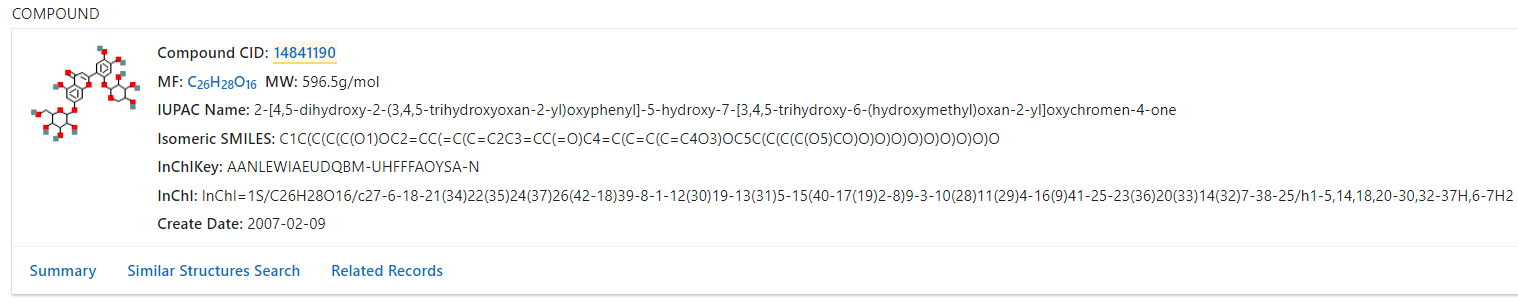

In [131]:
Image('20230830_170748.png')

In [115]:
m = df_CP['CID'] == CID_LST[0]
df_CP[m]

,ID,CID,INCHIKEY,SMILES,FORMULA,MW,EXACT_MW,LOGP,TPSA,ATOM,HBA,HBD,ROTB,AROM,ALERTS,DL,OB
2578,11824,14841190,AANLEWIAEUDQBM-UHFFFAOYSA-N,OCC1OC(Oc2cc(O)c3c(c2)oc(cc3=O)-c2cc(O)c(O)cc2...,C26H28O16,596.494,596.137735,-1.806,265.52,70,16,10,6,3,1,0.140576,N
2579,11825,14841190,AANLEWIAEUDQBM-UHFFFAOYSA-N,OCC1OC(Oc2cc(O)c3c(c2)oc(cc3=O)-c2cc(O)c(O)cc2...,C26H28O16,596.494,596.137735,-1.806,265.52,70,16,10,6,3,1,0.140576,N
2580,11828,14841190,AANLEWIAEUDQBM-UHFFFAOYSA-N,OCC1OC(Oc2cc(O)c3c(c2)oc(cc3=O)-c2cc(O)c(O)cc2...,C26H28O16,596.494,596.137735,-1.806,265.52,70,16,10,6,3,1,0.140576,N


In [121]:
m = df_MC['ID'] == 11824
df_MC[m]

,ID,COMPOUND,PMID,vals
LATIN,,,,
Taraxaci Herba,11824,isoetin-7-O-β-D-glucopyranosyl-2'-O-α-D-xyloyp...,18240133,1


In [122]:
m = df_MC['ID'] == 11825
df_MC[m]

,ID,COMPOUND,PMID,vals
LATIN,,,,
Taraxaci Herba,11825,isoetin-7-O-β-D-glucopyranosyl-2'-O-α-L-arabin...,18240133,1
Taraxaci Herba,11825,isoetin-7-O-β-D-glucopyranosyl-2'-O-α-L-arabin...,18720865,1
Taraxaci Herba,11825,isoetin-7-O-β-D-glucopyranosyl-2'-O-α-L-arabin...,18801488,1


In [123]:
m = df_MC['ID'] == 11828
df_MC[m]

,ID,COMPOUND,PMID,vals
LATIN,,,,
Oldenlandiae Diffusae Herba,11828,isoetin-7-O-β-D-glucopyranosyl-2'-O-β-D-xyloyp...,29941819,1
Taraxaci Herba,11828,isoetin-7-O-β-D-glucopyranosyl-2'-O-β-D-xyloyp...,18720865,1
Taraxaci Herba,11828,isoetin-7-O-β-D-glucopyranosyl-2'-O-β-D-xyloyp...,18801488,1


## 이런식으로 되야 맞는건데
- luteolin -> CID = 5280445
- luteolin -> ID = 125


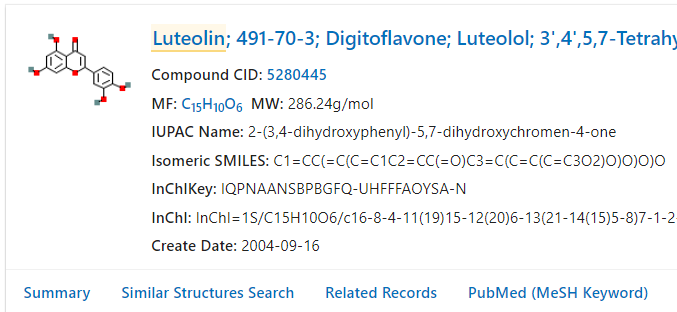

In [132]:
Image('20230830_172215.png')

In [128]:
df_MC

,ID,COMPOUND,PMID,vals
LATIN,,,,
Abelmoschi Corolla,490334,hibifolin,17258944,1
Abelmoschi Corolla,490334,hibifolin,19235125,1
Abelmoschi Corolla,490334,hibifolin,19298707,1
Abelmoschi Corolla,490334,hibifolin,21247814,1
Abelmoschi Corolla,490334,hibifolin,21784623,1
...,...,...,...,...
Zosterae Herba,125,luteolin,30804483,1
Zosterae Herba,124,apigenin,30804483,1
Zosterae Herba,113,caffeic acid,30804483,1


In [129]:
m = df_CP['CID'] == '5280445'
df_CP[m]

,ID,CID,INCHIKEY,SMILES,FORMULA,MW,EXACT_MW,LOGP,TPSA,ATOM,HBA,HBD,ROTB,AROM,ALERTS,DL,OB
122,125,5280445,IQPNAANSBPBGFQ-UHFFFAOYSA-N,Oc1cc(O)c2c(c1)oc(cc2=O)-c1ccc(O)c(O)c1,C15H10O6,286.239,286.047738,2.403,107.22,31,6,4,1,3,1,0.511621,Y


# (2)

In [116]:
m = df_CP['CID'] == CID_LST[1]
df_CP[m]

,ID,CID,INCHIKEY,SMILES,FORMULA,MW,EXACT_MW,LOGP,TPSA,ATOM,HBA,HBD,ROTB,AROM,ALERTS,DL,OB
1437,6038,6038,LISFMEBWQUVKPJ-UHFFFAOYSA-N,O=c1ccc2ccccc2[nH]1,C9H7NO,145.161,145.052764,1.597,29.10,18,1,1,0,2,0,0.598940,Y
5006,39117,6038,LISFMEBWQUVKPJ-UHFFFAOYSA-N,Oc1ccc2ccccc2n1,C9H7NO,145.161,145.052764,2.422,33.12,18,2,1,0,2,0,0.617108,Y


In [126]:
m = df_MC['ID'] == 6038
df_MC[m]

,ID,COMPOUND,PMID,vals
LATIN,,,,
Evodiae Fructus,6038,quinolone,10711594,1


In [127]:
m = df_MC['ID'] == 39117
df_MC[m]

,ID,COMPOUND,PMID,vals
LATIN,,,,
Schisandrae Fructus,39117,hydroxyquinoline,30666780,1


In [117]:
m = df_CP['CID'] == CID_LST[2]
df_CP[m]

,ID,CID,INCHIKEY,SMILES,FORMULA,MW,EXACT_MW,LOGP,TPSA,ATOM,HBA,HBD,ROTB,AROM,ALERTS,DL,OB
4384,37599,73157708,WGTYXIDAEFJHPD-UHFFFAOYSA-N,COc1cc(ccc1O)C1Oc2c(cc(CCCO)cc2OC2OC(CO)C(O)C(...,C25H32O11,508.52,508.194462,-0.457,178.53,68,11,7,9,2,0,0.233126,N
4388,37603,73157708,WGTYXIDAEFJHPD-UHFFFAOYSA-N,COc1cc(ccc1O)C1Oc2c(cc(CCCO)cc2OC2OC(CO)C(O)C(...,C25H32O11,508.52,508.194462,-0.457,178.53,68,11,7,9,2,0,0.233126,N


In [118]:
m = df_CP['CID'] == CID_LST[3]
df_CP[m]

,ID,CID,INCHIKEY,SMILES,FORMULA,MW,EXACT_MW,LOGP,TPSA,ATOM,HBA,HBD,ROTB,AROM,ALERTS,DL,OB
7939,90566,9897848|101243377,BXEZTCOKOLHMKY-PJUZUSDESA-O,COc1cc(cc(O)c1O)-c1[o+]c2cc(O)cc(O[C@@H]3O[C@H...,C43H49O23,933.841,933.265914,-0.146,367.04,115,22,13,14,4,4,0.033841,N
7940,90567,9897848|101243377,BXEZTCOKOLHMKY-PJUZUSDESA-O,COc1cc(cc(O)c1O)-c1[o+]c2cc(O)cc(O[C@@H]3O[C@H...,C43H49O23,933.841,933.265914,-0.146,367.04,115,22,13,14,4,4,0.033841,N


In [119]:
m = df_CP['CID'] == CID_LST[4]
df_CP[m]

,ID,CID,INCHIKEY,SMILES,FORMULA,MW,EXACT_MW,LOGP,TPSA,ATOM,HBA,HBD,ROTB,AROM,ALERTS,DL,OB
8539,91384,90469193,SCMZYGMTIITQCA-RXYNEKLLSA-N,OC(=O)[C@@H](Cc1ccc(O)c(O)c1)OC(=O)\C=C\c1ccc(...,C27H22O12,538.461,538.111126,4.228,222.28,61,11,8,10,3,4,0.0789,N
8540,91385,90469193,SCMZYGMTIITQCA-RXYNEKLLSA-N,OC(=O)[C@@H](Cc1ccc(O)c(O)c1)OC(=O)\C=C\c1ccc(...,C27H22O12,538.461,538.111126,4.228,222.28,61,11,8,10,3,4,0.0789,N


In [120]:
m = df_CP['CID'] == CID_LST[5]
df_CP[m]

,ID,CID,INCHIKEY,SMILES,FORMULA,MW,EXACT_MW,LOGP,TPSA,ATOM,HBA,HBD,ROTB,AROM,ALERTS,DL,OB
224,248,439763,QBYUNVOYXHFVKC-GBURMNQMSA-N,C[C@H](CCC(=O)NCCS(O)(=O)=O)[C@H]1CC[C@H]2[C@@...,C26H45NO5S,483.71,483.301845,2.481,103.7,78,5,3,7,0,1,0.482844,Y
228,252,439763,QBYUNVOYXHFVKC-GBURMNQMSA-N,C[C@H](CCC(=O)NCCS(O)(=O)=O)[C@H]1CC[C@H]2[C@@...,C26H45NO5S,483.71,483.301845,2.481,103.7,78,5,3,7,0,1,0.482844,Y
